<a href="https://colab.research.google.com/github/cam2149/MachinelearningI/blob/main/Examen1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maestría en Inteligencia Artificial Aplicada

## Aprendizaje Automatico 1

## Examen 1

### Integrantes

- Yesid Castelblanco
- Andres Felipe Borrero
- Carlos Alberto Martinez Ramirez
- Nicolas Colmenares

### **Profesores**

- Santiago Ortiz
- Henry Velasco

Fecha: _ de 2024

# Ejercicio 1

## Datos

Considere el conjunto de datos “data1” del fichero data_exam1.xls

### Puntos

1. Realice un análisis exploratorio de datos ¿Considera que podría generar un modelo de regresión lineal con variable categórica (sin interacción) para la variable Y? Justifique. Si la
respuesta a la pregunta es SI, genere un modelo de regresión sin interacción e interpretelo.

2. Realice un gráfico de dispersión para Y vs X, considerando para cada observación su respectivo valor en la variable Ind. ¿Hay evidencia muestral que sugiera un cambio en la tasa media de cambio de Y condicionado a incrementos unitarios de X? ¿Considera que un modelo con
interacciones sería más adecuado? Si la respuesta a estas preguntas es afirmativa, genere el
respectivo modelo, interprete detalladamente los resultados y valide los supuestos del modelo propuesto

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
url = 'https://github.com/cam2149/MachinelearningI/raw/85795f6469ebde1f693b7cb6c893c10135408974/data_exam1.xlsx'

df=pd.read_excel(url, sheet_name='data1')

In [3]:
df

,Y,X,Ind
0,66.199147,12.653765,0
1,44.311301,8.204418,0
2,48.390783,8.768596,0
3,58.087413,16.169568,1
4,60.708671,9.980310,0
...,...,...,...
995,54.191565,6.769546,0
996,37.481140,9.297337,1
997,26.864547,9.391452,0
998,100.950444,17.370262,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       1000 non-null   float64
 1   X       1000 non-null   float64
 2   Ind     1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [5]:
df.describe()

,Y,X,Ind
count,1000.000000,1000.000000,1000.0000
mean,46.953751,9.976858,0.2000
std,22.046143,3.762567,0.4002
min,-34.894319,-4.263757,0.0000
25%,32.427643,7.638899,0.0000
50%,45.460252,9.952888,0.0000
75%,61.587567,12.379984,0.0000
max,135.542574,25.628678,1.0000


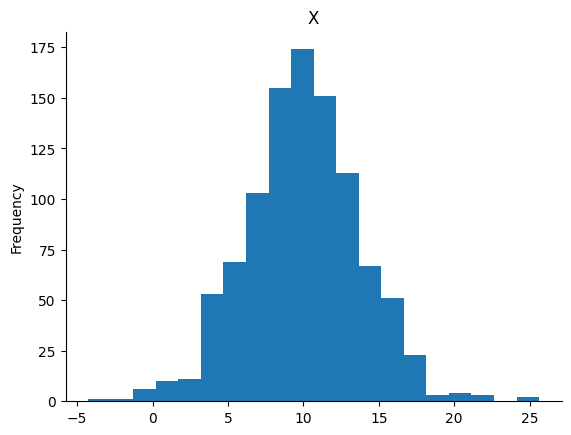

In [6]:
# @title X

from matplotlib import pyplot as plt
df['X'].plot(kind='hist', bins=20, title='X')
plt.gca().spines[['top', 'right',]].set_visible(False)

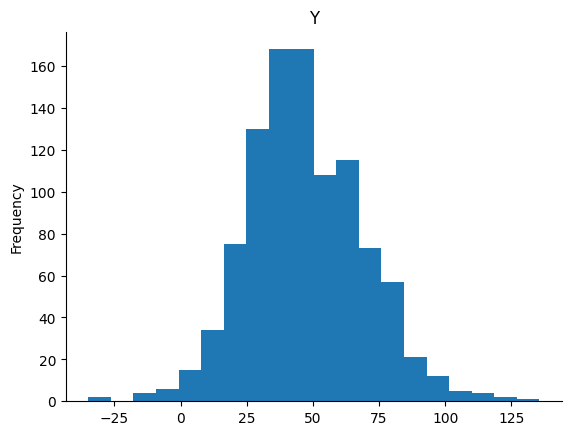

In [7]:
# @title Y

from matplotlib import pyplot as plt
df['Y'].plot(kind='hist', bins=20, title='Y')
plt.gca().spines[['top', 'right',]].set_visible(False)

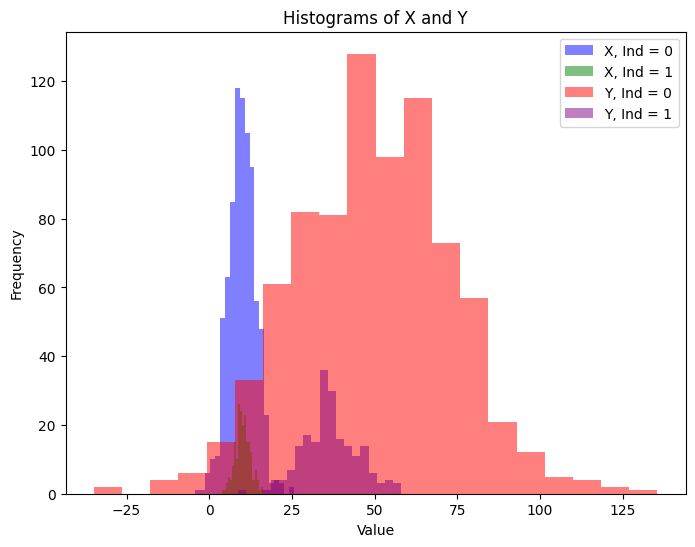

In [8]:
# @title Histograms of X and Y

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df[df['Ind'] == 0]['X'], bins=20, alpha=0.5, label='X, Ind = 0', color='blue')
plt.hist(df[df['Ind'] == 1]['X'], bins=20, alpha=0.5, label='X, Ind = 1', color='green')
plt.hist(df[df['Ind'] == 0]['Y'], bins=20, alpha=0.5, label='Y, Ind = 0', color='red')
plt.hist(df[df['Ind'] == 1]['Y'], bins=20, alpha=0.5, label='Y, Ind = 1', color='purple')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of X and Y')
_ = plt.legend()

<Figure size 800x600 with 0 Axes>

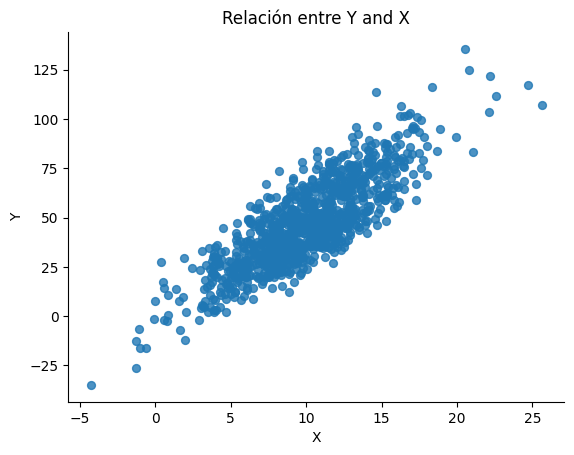

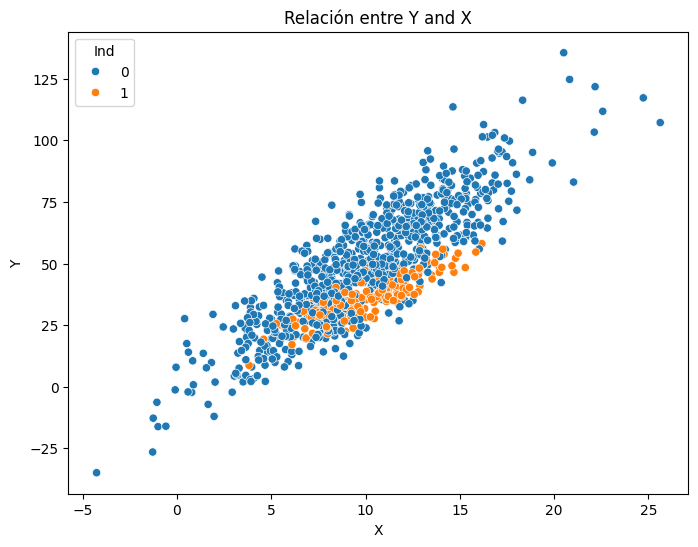

In [12]:
# @title Y vs X

from matplotlib import pyplot as plt
plt.figure(figsize=(8, 6))
df.plot(kind='scatter', x='X', y='Y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Relación entre Y and X')
plt.show()

# Analyze the relationship between Y and X
plt.figure(figsize=(8, 6))
sns.scatterplot(x='X', y='Y', hue='Ind', data=df)
plt.title('Relación entre Y and X')
plt.show()



Text(0, 0.5, 'Y')

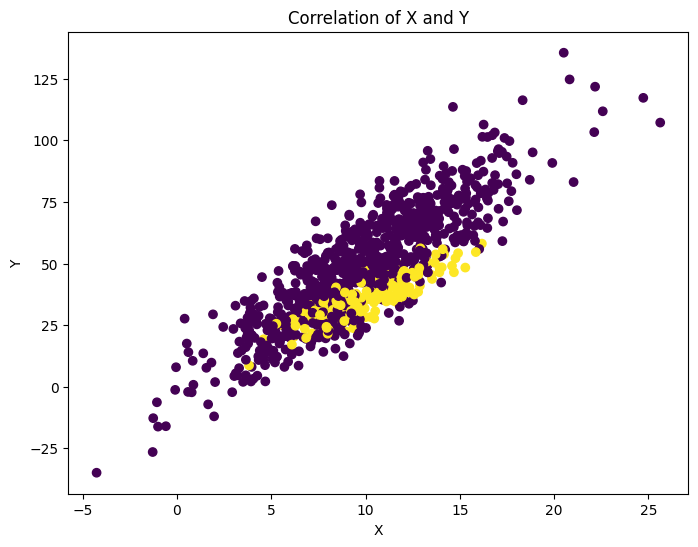

In [ ]:
# @title Correlación entre 'X' y 'Y'

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['X'], df['Y'], c=df['Ind'], cmap='viridis')
plt.title('Correlation of X and Y')
plt.xlabel('X')
plt.ylabel('Y')



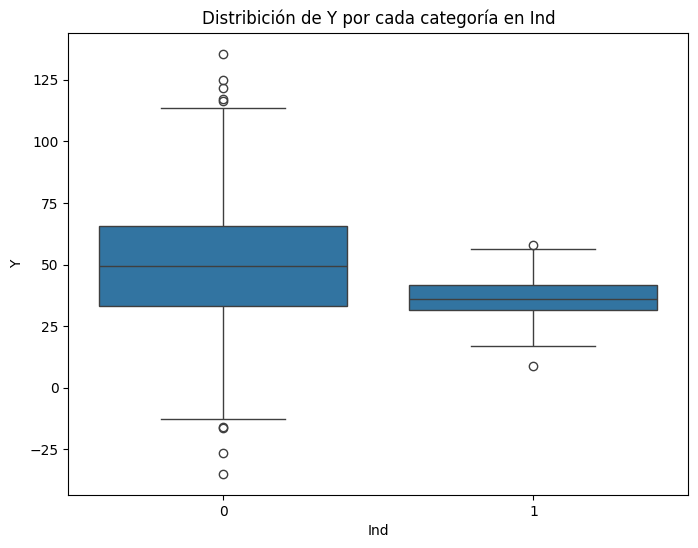

In [ ]:
# @title Distribución de 'Y' por cada categoría de Ind

plt.figure(figsize=(8, 6))
sns.boxplot(x='Ind', y='Y', data=df)
plt.title('Distribición de Y por cada categoría en Ind')
plt.show()

El diagrama de caja indica que la distribución de Y podría ser diferente para cada categoría de Ind.

In [ ]:
# @title Matriz de correlación
correlation_matrix = df.corr()
print(correlation_matrix)


            Y         X       Ind
Y    1.000000  0.832057 -0.237224
X    0.832057  1.000000  0.024069
Ind -0.237224  0.024069  1.000000


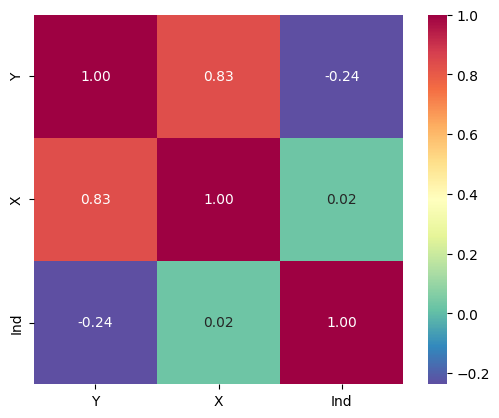

In [ ]:
# Correlacion entre variables
numeric_df = df.select_dtypes(include=['number'])
corrmat = numeric_df.corr()

hm = sns.heatmap(corrmat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=numeric_df.columns,
                 xticklabels=numeric_df.columns,
                 cmap="Spectral_r")
plt.show()

La matriz de correlación muestra la correlación entre X e Y y las correlaciones entre las variables y la variable dependiente Y.

In [ ]:
# @title Estadistica Descriptiva del Dataframe
df.describe()

,Y,X,Ind
count,1000.000000,1000.000000,1000.0000
mean,46.953751,9.976858,0.2000
std,22.046143,3.762567,0.4002
min,-34.894319,-4.263757,0.0000
25%,32.427643,7.638899,0.0000
50%,45.460252,9.952888,0.0000
75%,61.587567,12.379984,0.0000
max,135.542574,25.628678,1.0000


En respuesta a la pregunta **¿Considera que podría generar un modelo de regresión lineal con variable categórica (sin interacción) para la variable Y? **
Basado en el análisis exploratorio de datos, el diagrama de dispersión muestra una posible dependiencia entre X e Y, se identifica una dependencia de tipo relacion directa (directamente proporcional). Se evidencia cierta correlación entre X e Y y sin interacción de la variable categorica Ind, lo que parece posible construir un modelo de regresión.
Podemos generar un modelo para predecir Y utilizando X e Ind.

In [13]:
#Modelo de regresión lineal con variable categórica Ind sin interacción para la variable Y
# Importar librerías necesarias
import statsmodels.formula.api as sm
# Generar el modelo de regresión lineal con variable categórica Ind sin interacción
model = sm.ols('Y ~ X + C(Ind)', data=df).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     1566.
Date:                Sun, 29 Sep 2024   Prob (F-statistic):          2.25e-308
Time:                        16:39:35   Log-Likelihood:                -3801.1
No. Observations:                1000   AIC:                             7608.
Df Residuals:                     997   BIC:                             7623.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.7873      0.984      0.800      

# Conclusiones

1. El modelo explica una parte de la variabilidad en la variable dependiente Y.
2. La variable X tiene un efecto significativo sobre Y, siendo la pendiente positiva, evidenciado en los graficos de dispersión.
3. La variable Ind, como variable categórica, también impacta en Y, aunque el efecto puede variar según la categoría de Ind como se evidencia en el grafico Distribución de 'Y' por cada categoría de Ind.
4.  La intersección del modelo representa el valor esperado de Y cuando tanto X como Ind son cero.

# 'Y ~ X + C(Ind)'

Esta fórmula define un modelo de regresión lineal donde:
* Y es la variable dependiente (la que queremos predecir).
* X es una variable independiente numérica (explicativa).
* C(Ind) representa una variable independiente categórica llamada 'Ind'.

El modelo intenta encontrar una relación lineal entre Y y X, considerando además los diferentes efectos que pueden tener las diferentes categorías de la variable Ind.

Al usar C(Ind), se está especificando que se cree una variable ficticia (dummy variable) para cada categoría de Ind, excepto una (que se utiliza como referencia). Esto permite que el modelo estime el efecto de cada categoría de Ind, comparándolo con la categoría de referencia.
"""


# Ejercicio 2

## Datos

**data2** del fichero **data_exam.xlsx**

## Puntos

- De acuerdo al analisis del item anterior proponer una transformación para alguna variable y justificar
- Proponer un modelo lineal, iterpretar y validar supuestos